In [101]:
import numpy as np
import pandas as pd
import random 
from scipy.stats import norm
from math import pow

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
url = '/content/drive/Shareddrives/Optimización estocástica/Reto/Data/serieBanc0.csv'
data = pd.read_csv(url)

In [104]:
length = 254

In [105]:
data

,Fecha,v
0,2021-10-11,4.9850
1,2021-10-12,4.9862
2,2021-10-13,4.9825
3,2021-10-14,4.9857
4,2021-10-15,4.9806
...,...,...
249,2022-10-04,9.5366
250,2022-10-05,9.5453
251,2022-10-06,9.5515
252,2022-10-07,9.5451


In [106]:
data['Ln'] = np.log(data['v'])
data['Incremento'] = np.insert(np.diff(data['Ln']), 0, 0)
data

,Fecha,v,Ln,Incremento
0,2021-10-11,4.9850,1.606433,0.000000
1,2021-10-12,4.9862,1.606674,0.000241
2,2021-10-13,4.9825,1.605932,-0.000742
3,2021-10-14,4.9857,1.606574,0.000642
4,2021-10-15,4.9806,1.605550,-0.001023
...,...,...,...,...
249,2022-10-04,9.5366,2.255137,0.000168
250,2022-10-05,9.5453,2.256049,0.000912
251,2022-10-06,9.5515,2.256698,0.000649
252,2022-10-07,9.5451,2.256028,-0.000670


In [107]:
sum(data['Incremento'])

0.6497411917575804

In [108]:
h = 1/254
x_bar = data['Incremento'].mean()
s_x2 = data['Incremento'].var()

In [109]:
mu = (x_bar/h) + ((s_x2/2)*h)
sigma = np.sqrt(s_x2)/np.sqrt(h) 

In [110]:
mu

0.6497414656250088

In [111]:
x_bar

0.00255803618802197

In [112]:
s_x2

0.00013912465360299295

In [113]:
sigma

0.18798314290159157

In [114]:
def brownian_motion(s, mu, sigma, n, h):
  ans = []
  sum = 0
  for i in range(n):
    z = np.random.normal()*pow(-1,i)
    x = mu*h - ((sigma**2)/2)*h + sigma*np.sqrt(h)*z
    sum += x
    ans.append(s*np.exp(sum))

  return ans

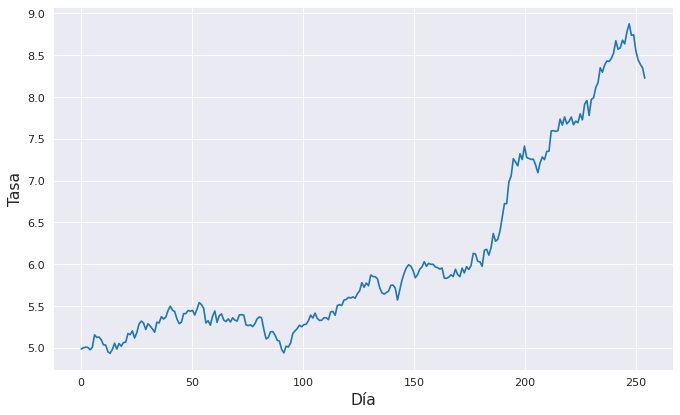

In [115]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

random_variables = brownian_motion(4.9850, mu, sigma, length, h)

x = np.linspace(0, 254, length)

sns.lineplot(x = x, y = random_variables)
plt.xlabel('Día', fontsize=14)
plt.ylabel('Tasa', fontsize=14)
plt.show()

In [116]:
random_variables = brownian_motion(4.9850, mu, sigma, length, h)
random_variables[-1]

10.294302929703866

In [117]:
random_variables = brownian_motion(s_x2, mu, sigma, length, h)
sum(random_variables)

0.046742347019947846

9.441408948450318


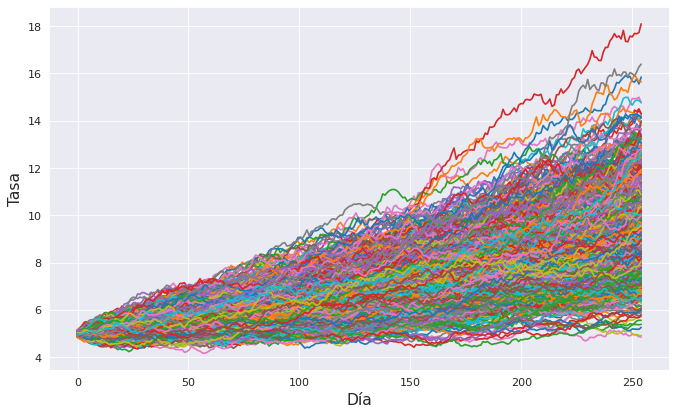

In [118]:
figure(figsize=(10, 6), dpi=80)
plt.xlabel('Día', fontsize=14)
plt.ylabel('Tasa', fontsize=14)

n_iterations = 1000
ans = 0
ans_list = []
for i in range(n_iterations):
  
  random_variables = brownian_motion(4.9850, mu, sigma, length, h)
  ans += random_variables[-1]
  ans_list.append(random_variables[-1])
  sns.lineplot(x = x, y = random_variables)

print(ans/n_iterations)

plt.show()

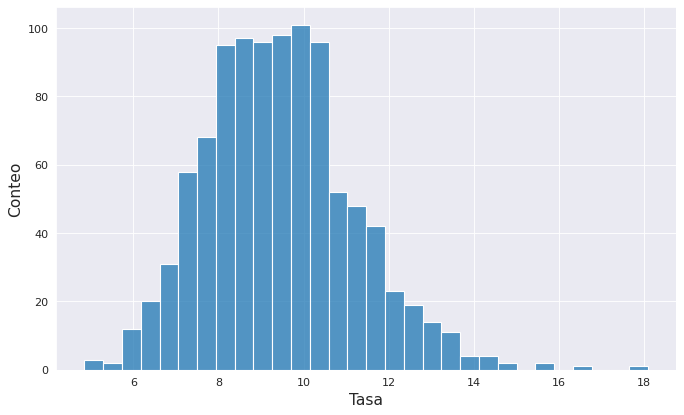

In [127]:
figure(figsize=(10, 6), dpi=80)
plt.xlabel('Tasa', fontsize=14)
plt.ylabel('Conteo', fontsize=14)
sns.histplot(ans_list)

In [120]:
def tasa(n_iterations):
  ans = 0
  for i in range(n_iterations):
    
    random_variables = brownian_motion(4.9850, mu, sigma, length, h)
    ans += random_variables[-1]

  return ans/n_iterations

In [121]:
# figure(figsize=(10, 6), dpi=80)
# plt.xlabel('Iteración', fontsize=14)
# plt.ylabel('Tasa', fontsize=14)

# tasas = []
# x = []
# for i in range(1, 500):
#   tasas.append(tasa(i))
#   x.append(i)

# sns.lineplot(x = x, y = tasas)
# plt.show()

In [122]:
100 + 100*.095498

109.5498

In [123]:
tasa = 9.530006345253213

In [135]:
def C(K, T, s):
  tao = T/252
  Libor = .34
  r = np.log(1 + Libor/100)

  d1 = (np.log(s/K) + r*tao + sigma**2*tao/2)/(sigma*np.sqrt(tao))
  d2 = d1 - sigma*np.sqrt(tao)

  N1 = (norm.cdf(d1))
  N2 = (norm.cdf(d2))

  C = s*N1 - K*np.exp(-r*tao)*N2

  return C

In [138]:
K = 100
T = 254
tao = T/252
Libor = .34
r = np.log(1 + Libor/100)
s = K + (K * (tasa/100))

d1 = (np.log(s/K) + r*tao + sigma**2*tao/2)/(sigma*np.sqrt(tao))
d2 = d1 - sigma*np.sqrt(tao)

N1 = (norm.cdf(d1))
N2 = (norm.cdf(d2))

K = [50, 50, 50, 75, 75, 75, 100, 100, 100]
T = [1, 30, 254, 1, 30, 254, 1, 30, 254]
s_list = [100+tasa]*9

cost_list = []
for i in range(len(K)):
  cost_list.append(C(K[i], T[i], s_list[i]))

results = pd.DataFrame({'K': K, 'T': T, 's': s_list, 'C(s, t)': cost_list})

cost = C(100, 254, 100+tasa)

In [139]:
results

,K,T,s,"C(s, t)"
0,50,1,109.530006,59.530680
1,50,30,109.530006,59.550206
2,50,254,109.530006,59.700818
3,75,1,109.530006,34.531017
4,75,30,109.530006,34.560306
5,75,254,109.530006,34.921321
6,100,1,109.530006,9.531353
7,100,30,109.530006,9.813911
8,100,254,109.530006,13.760057


In [131]:
cost

13.760057179082636